# Step 6: Plate characters recognition

## Imports

In [7]:
import json
import os
from argparse import Namespace
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.local_utils import inference_utils
from src.local_utils.constants import (
    MODEL_CONFIG_FILE,
    RU_PLATES_IMAGES_PATH,
    RU_PLATES_LABELS_FILE,
    PLATES_BEST_MODEL_FILE,
    CONFIDENCE_THRESHOLD,
    PREDICTIONS,
)
from random import randrange

## Model & Dataset Configuration

In [8]:
from src.subjects import Subject
args = Namespace()
args.images = os.path.join(RU_PLATES_IMAGES_PATH, '*.jpg')
args.config = MODEL_CONFIG_FILE
args.weights = PLATES_BEST_MODEL_FILE
args.label_maps = RU_PLATES_LABELS_FILE
args.confidence_threshold = CONFIDENCE_THRESHOLD
args.num_predictions = PREDICTIONS

## Preparation

Loading config file.

In [9]:
with open(args.config, mode='r') as config_file:
    config = json.load(config_file)

model_config = config["model"]
input_size = config["model"]["input_size"]

In [10]:
model,\
label_maps,\
process_input_fn = inference_utils.inference_ssd_mobilenetv2(config, args)

ValueError: No such layer: input_1.

Loading weights.

In [ ]:
model.load_weights(args.weights)

## Predict model

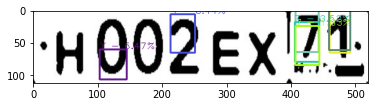

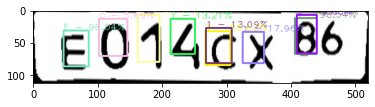

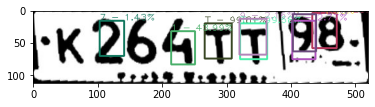

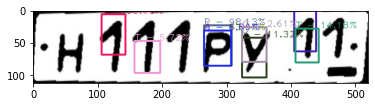

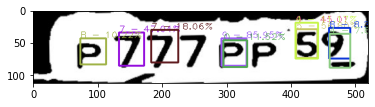

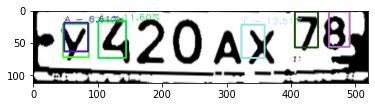

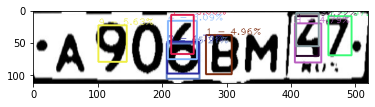

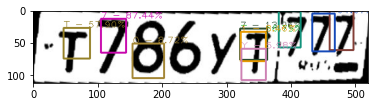

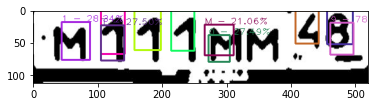

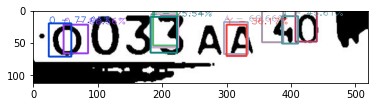

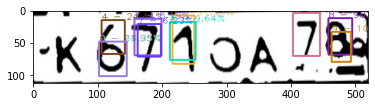

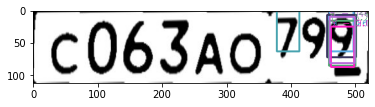

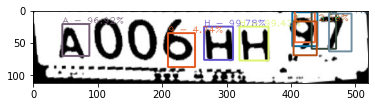

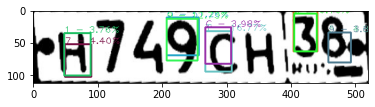

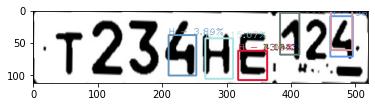

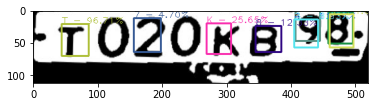

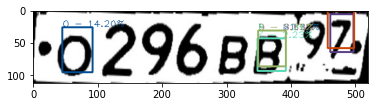

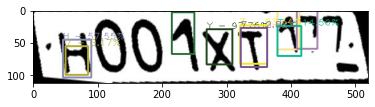

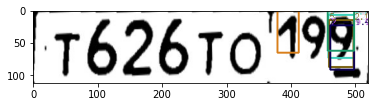

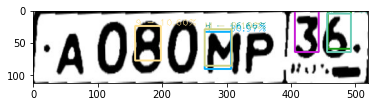

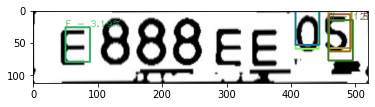

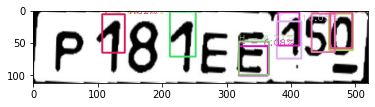

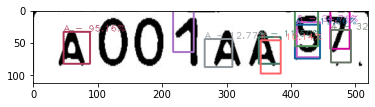

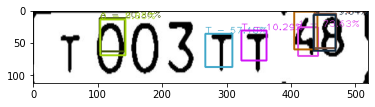

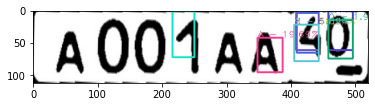

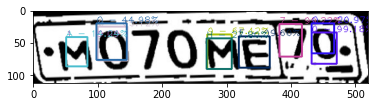

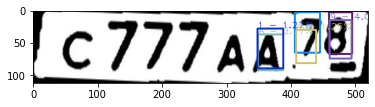

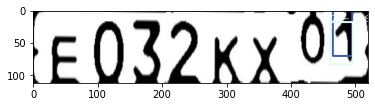

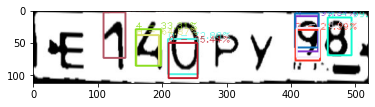

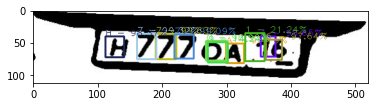

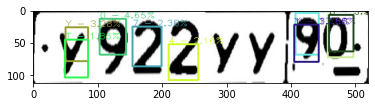

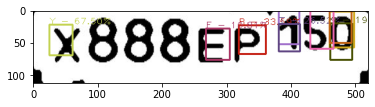

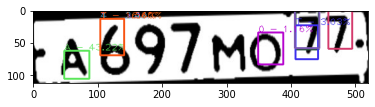

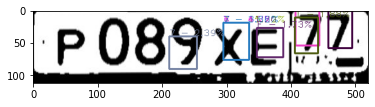

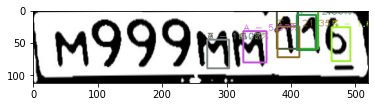

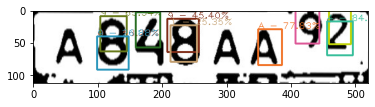

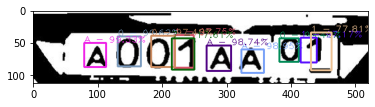

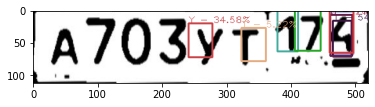

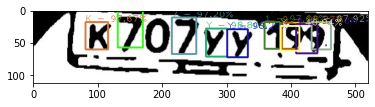

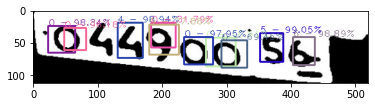

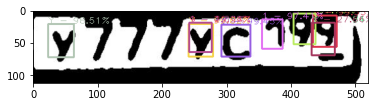

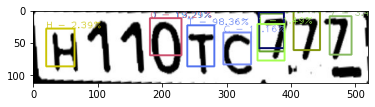

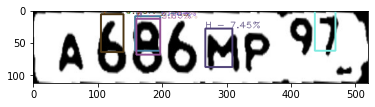

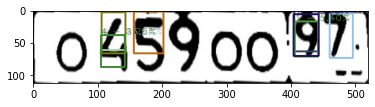

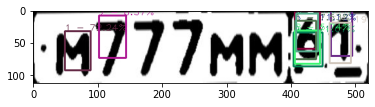

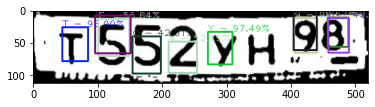

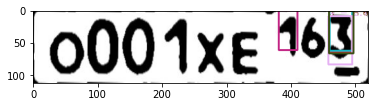

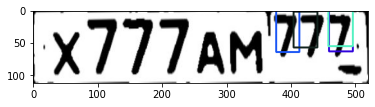

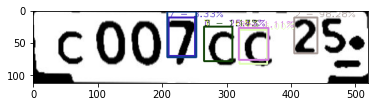

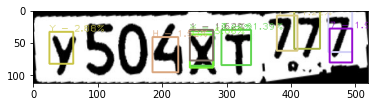

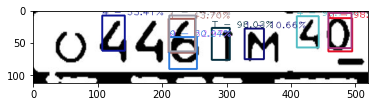

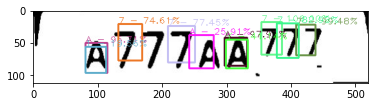

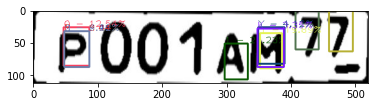

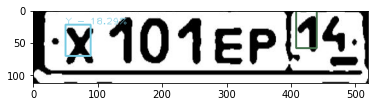

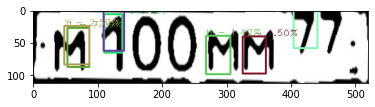

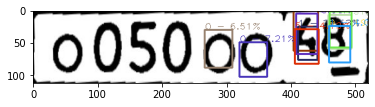

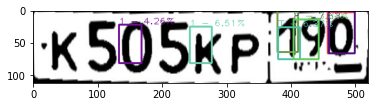

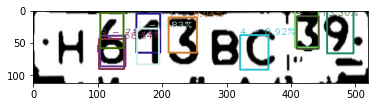

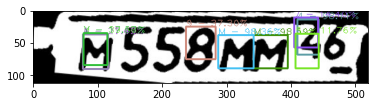

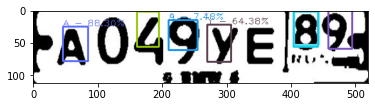

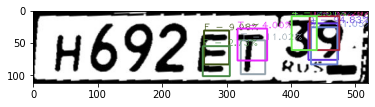

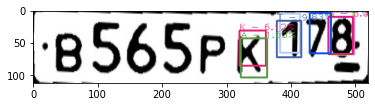

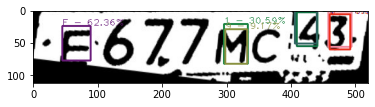

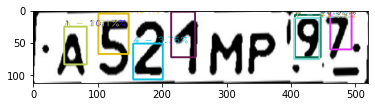

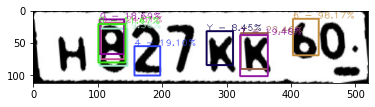

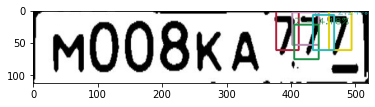

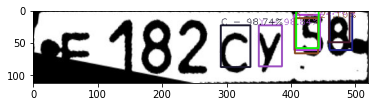

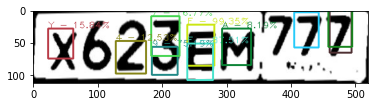

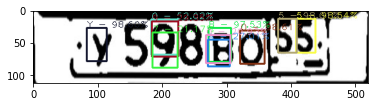

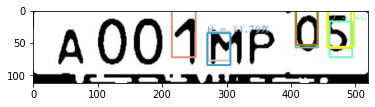

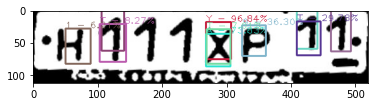

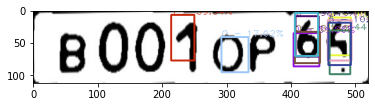

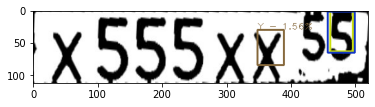

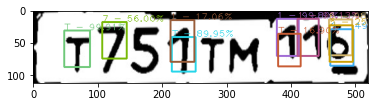

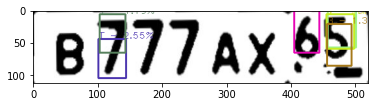

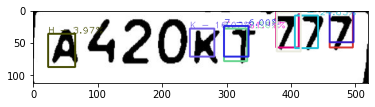

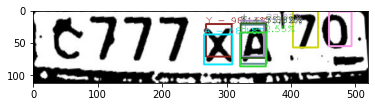

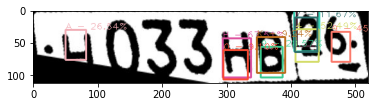

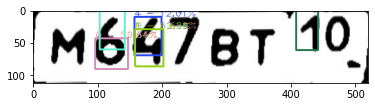

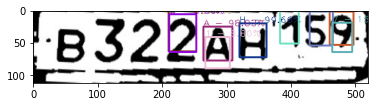

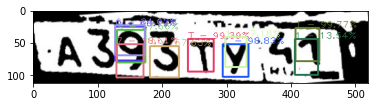

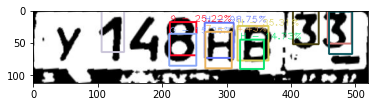

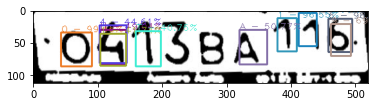

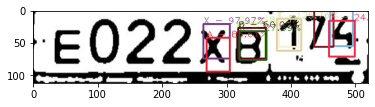

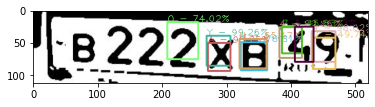

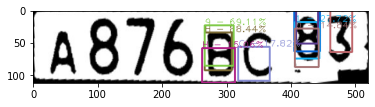

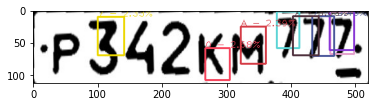

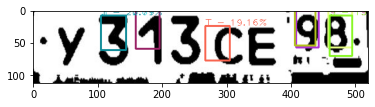

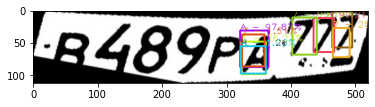

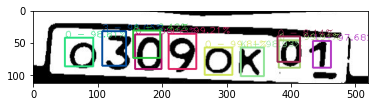

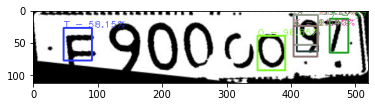

In [11]:
for idx, input_image in enumerate(list(glob(args.images))):
    image = cv2.imread(input_image)
    image = np.array(image, dtype=np.float)
    image = np.uint8(image)

    display_image = image.copy()
    image_height, image_width, _ = image.shape
    height_scale, width_scale = input_size / image_height, input_size / image_width

    image = cv2.resize(image, (input_size, input_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = process_input_fn(image)

    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)

    for i, pred in enumerate(y_pred[0]):
        confidence_score = pred[1]
        score = f"{'%.2f' % (confidence_score * 100)}%"

        classname = label_maps[int(pred[0]) - 1].upper()

        x1 = max(min(int(pred[2] / width_scale), image_width - 1), 0)
        y1 = max(min(int(pred[3] / height_scale), image_height - 1), 0)
        x2 = max(min(int(pred[4] / width_scale), image_width - 1), 0)
        y2 = max(min(int(pred[5] / height_scale), image_height - 1), 0)

        color = (randrange(0, 255), randrange(0, 255), randrange(0, 255))

        cv2.rectangle(
            display_image,
            (x1, y1),
            (x2, y2),
            color,
            2,
        )

        cv2.putText(
            display_image,
            f'{classname} - {score}',
            (min(x1, x2), min(y1, y2)),
            cv2.FONT_HERSHEY_PLAIN,
            1,
            color,
            1,
        )

    plt.imshow(display_image)
    plt.show()